# Entrega 2

In [39]:
#--Librerias
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np

In [40]:
#Datos
data = pd.read_csv('Cars93.csv')
data.keys()
data.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [41]:
# Llenar los datos Nan con la media 
data['Luggage.room']=data['Luggage.room'].fillna(data['Luggage.room'].mean())
data['Rear.seat.room']=data['Rear.seat.room'].fillna(data['Rear.seat.room'].mean())

In [42]:
data.isnull().sum()

Unnamed: 0            0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

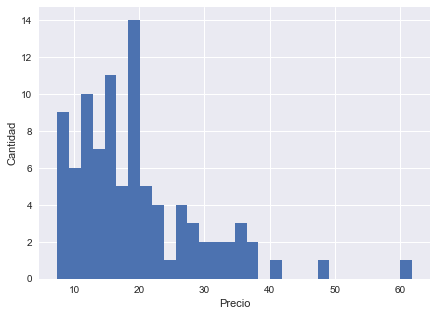

In [43]:
#Varible de 
y='Price'
Y= data[y]
#Histrograma de precios 
fig= plt.figure(figsize=(7,5))
plt.hist(data['Price'],bins=30)
plt.ylabel('Cantidad')
plt.xlabel('Precio')
plt.show()

In [44]:
catergorias=data.keys()
catergorias
val=[]
for i in data.dtypes:
    if i=='object':
        val.append(False)
    else:
        val.append(True)

### Se dejaran solo los que contegan valor numerica

In [45]:

h=[]
for i in range(1,len(val)):
    if val[i]:
        h.append(catergorias[i])
h.remove('Min.Price')
h.remove('Price')
h.remove('Max.Price')
h

['MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

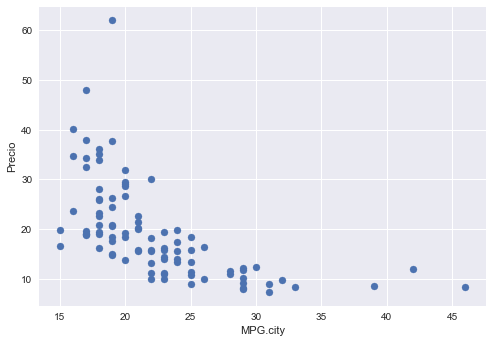

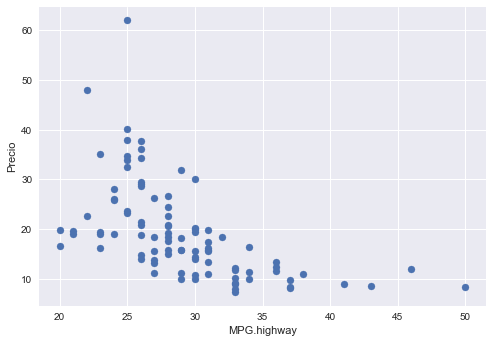

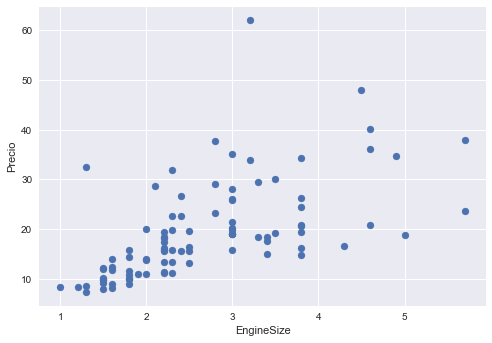

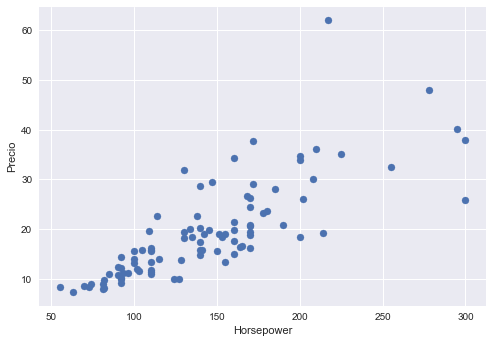

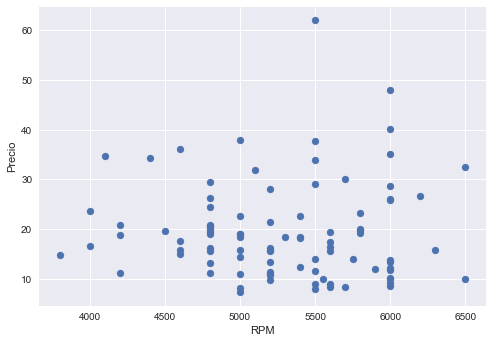

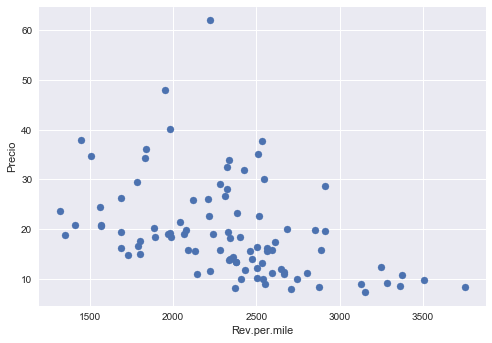

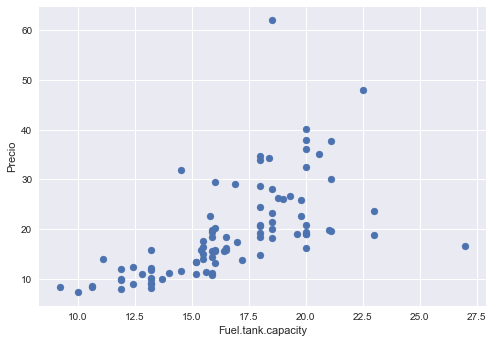

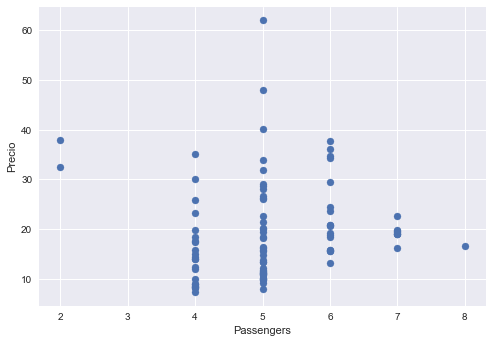

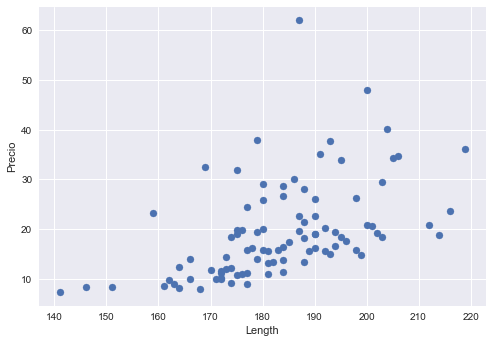

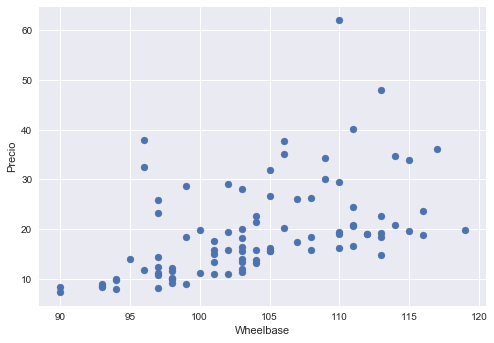

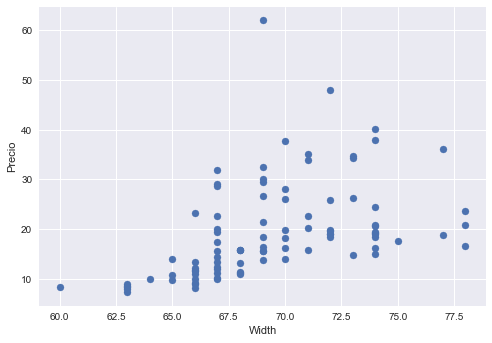

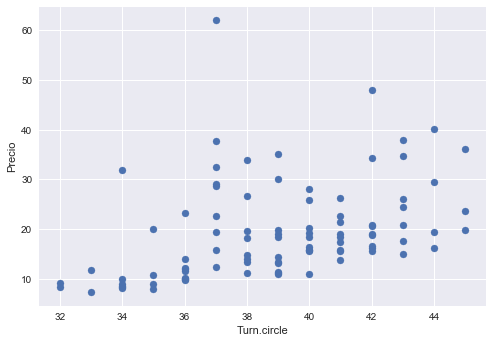

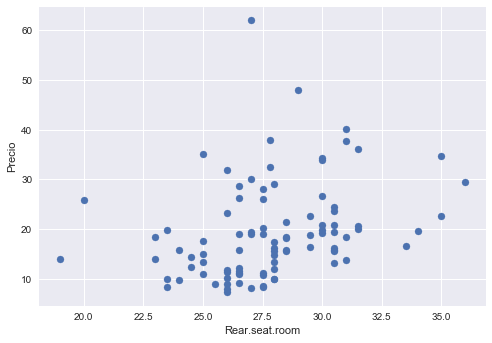

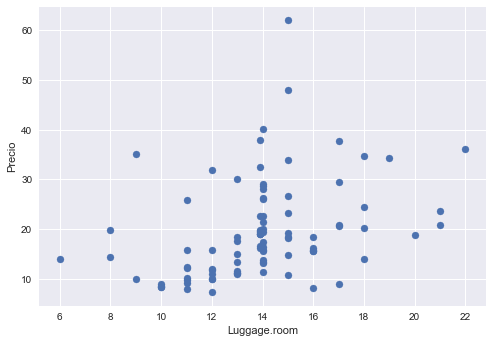

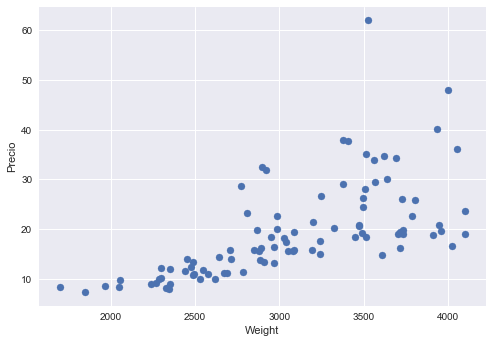

In [46]:
for i in h:
    plt.scatter(data[i],data[y])
    plt.ylabel('Precio')
    plt.xlabel(i)
    plt.show()

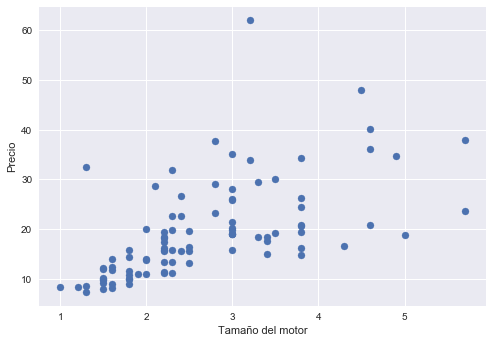

In [47]:
plt.scatter(data['EngineSize'],data[y])
plt.ylabel('Precio')
plt.xlabel('Tamaño del motor')
plt.show()

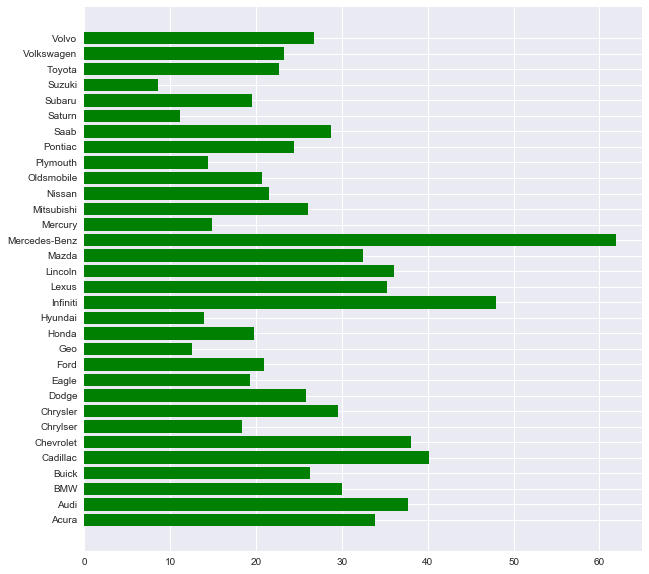

In [50]:
fig = plt.figure(figsize=(10,10))
plt.barh(data['Manufacturer'],data['Price'],color='green')
plt.show()

Para el punto de corte se trendrá en cuenta el precio promedio

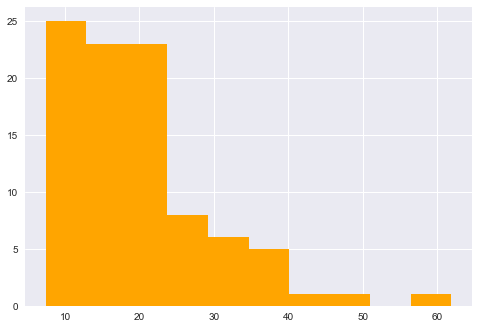

In [88]:
plt.hist(Y,color='orange')
plt.show()

In [89]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,max_depth=10)
model

RandomForestClassifier(max_depth=10)

In [90]:
Y_price = []
for i in Y:
    if i<=Y.mean():
        Y_price.append(0)
    else:
        Y_price.append(1)

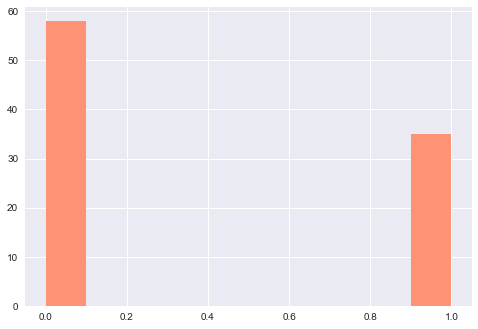

In [91]:
plt.hist(Y_price,color=np.random.rand(3))
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np.array(data[h]),Y_price)

In [93]:
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [94]:
precis = sum(Y_pred == Y_test)/len(Y_test)
print("La precición del modelo fue: "+ str(round(precis,2)))

La precición del modelo fue: 0.75


### Conclusión 

In [95]:
pesos = model.feature_importances_
for i in range(len(h)):
    print("El peso para la variable {} es {}".format(h[i],round(pesos[i],3)))

El peso para la variable MPG.city es 0.156
El peso para la variable MPG.highway es 0.081
El peso para la variable EngineSize es 0.059
El peso para la variable Horsepower es 0.127
El peso para la variable RPM es 0.034
El peso para la variable Rev.per.mile es 0.041
El peso para la variable Fuel.tank.capacity es 0.132
El peso para la variable Passengers es 0.032
El peso para la variable Length es 0.042
El peso para la variable Wheelbase es 0.058
El peso para la variable Width es 0.043
El peso para la variable Turn.circle es 0.02
El peso para la variable Rear.seat.room es 0.044
El peso para la variable Luggage.room es 0.049
El peso para la variable Weight es 0.082


Viendo entonces los pesos de las varibles según el modelo elegido, se puede ver que la varaible con mayor significación fueron: MPG.citt, Horsepwer y Fuel.tank.capacity.

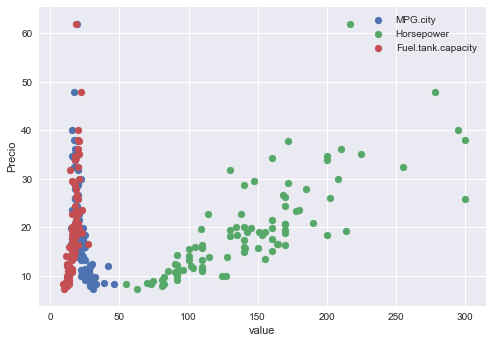

In [96]:
plt.scatter(data['MPG.city'],data['Price'],label='MPG.city')
plt.scatter(data['Horsepower'],data['Price'],label='Horsepower')
plt.scatter(data['Fuel.tank.capacity'],data['Price'],label='Fuel.tank.capacity')
plt.ylabel('Precio')
plt.xlabel('value')
plt.legend()
plt.show()